In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/tdac-wine/Val_Data.csv
/kaggle/input/tdac-wine/Test_Data.csv
/kaggle/input/tdac-wine/Example_Submission.csv


Importing libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
df=pd.read_csv('/kaggle/input/tdac-wine/Test_Data.csv')

In [4]:
df.head()

,index,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [5]:
df.type.unique()

array([0, 1])

In [6]:
df.drop("index",axis=1,inplace=True)

In [7]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.206369,0.340449,0.317258,5.402732,0.055525,30.296613,115.276217,0.994669,3.219861,0.530698,10.502491,5.823167,0.753896
std,1.294157,0.165516,0.145607,4.754034,0.032743,17.234017,56.082171,0.003017,0.159541,0.147452,1.193519,0.874373,0.430781
min,3.900000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,77.000000,0.992290,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.000000,0.065000,41.000000,155.000000,0.996920,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.464000,146.500000,366.500000,1.038980,4.010000,1.980000,14.900000,9.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 13 columns):
fixed.acidity           5197 non-null float64
volatile.acidity        5197 non-null float64
citric.acid             5197 non-null float64
residual.sugar          5197 non-null float64
chlorides               5197 non-null float64
free.sulfur.dioxide     5197 non-null float64
total.sulfur.dioxide    5197 non-null float64
density                 5197 non-null float64
pH                      5197 non-null float64
sulphates               5197 non-null float64
alcohol                 5197 non-null float64
quality                 5197 non-null int64
type                    5197 non-null int64
dtypes: float64(11), int64(2)
memory usage: 527.9 KB


In [9]:
df.isna().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Checking the count of both types

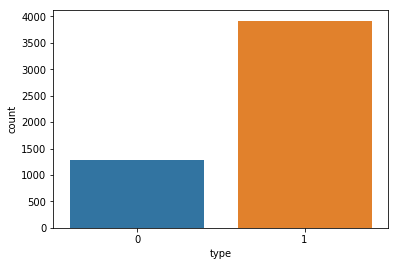

In [10]:
sns.countplot(df['type'])

Heatmap for displaying correlation

(13.5, -0.5)

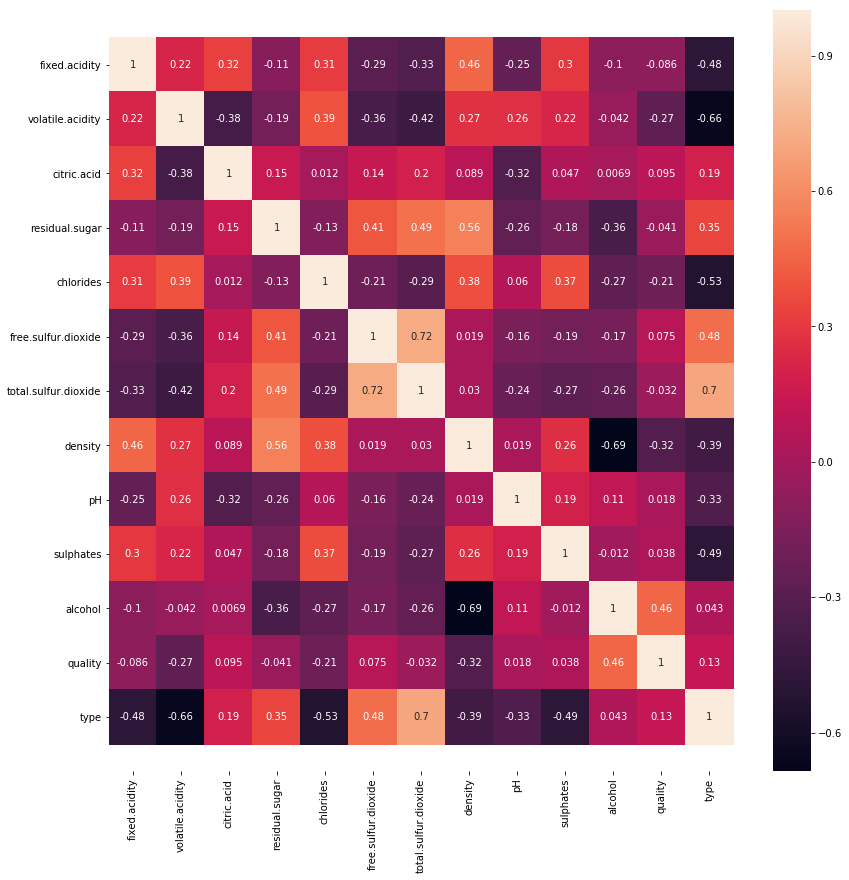

In [11]:
plt.figure(figsize=(14,14))
ax=sns.heatmap(df.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [12]:
target=df['type']
df.drop('type',axis=1,inplace=True)

Preprocessing

In [13]:
min_max_scaler=preprocessing.MinMaxScaler()
scaled_vals=min_max_scaler.fit_transform(df.values)
preprocessed_df=pd.DataFrame(scaled_vals,columns=df.columns)
preprocessed_df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,0.291667,0.413333,0.000000,0.019939,0.147253,0.068729,0.077670,0.206092,0.612403,0.193182,0.202899,0.333333
1,0.325000,0.533333,0.000000,0.030675,0.195604,0.164948,0.169209,0.186813,0.372093,0.261364,0.260870,0.333333
2,0.325000,0.453333,0.024096,0.026074,0.182418,0.096220,0.133148,0.190669,0.418605,0.244318,0.260870,0.333333
3,0.608333,0.133333,0.337349,0.019939,0.145055,0.109966,0.149792,0.209948,0.341085,0.204545,0.260870,0.500000
4,0.291667,0.413333,0.000000,0.019939,0.147253,0.068729,0.077670,0.206092,0.612403,0.193182,0.202899,0.333333


Reduce dimensionality

In [14]:
from sklearn.manifold import TSNE
data=TSNE(n_components=2, early_exaggeration=2.0).fit_transform(preprocessed_df)
data=pd.DataFrame(data)
data.head()

,0,1
0,2.125324,69.259071
1,-5.374457,73.238953
2,-5.300780,72.810509
3,-44.327984,63.890366
4,2.125209,69.261040


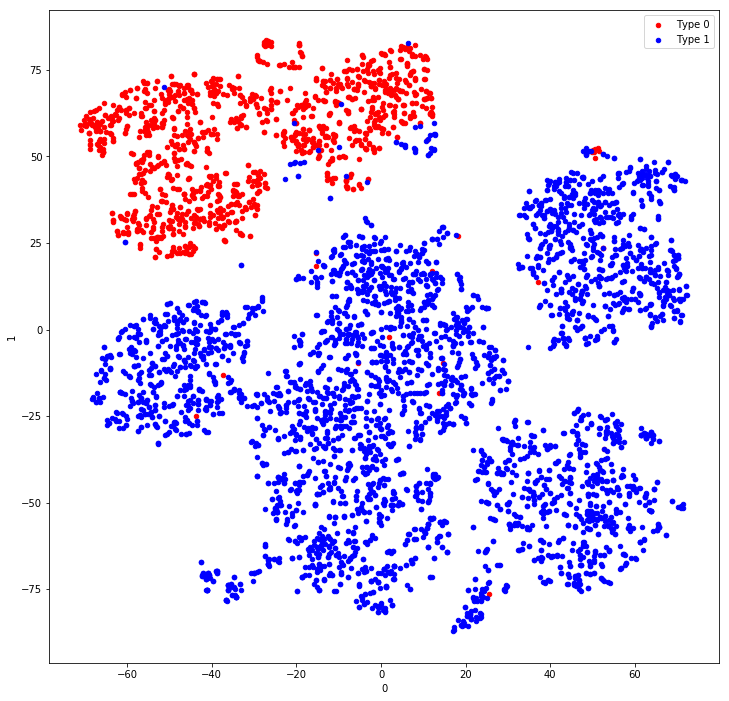

In [15]:
type0=data[target==0]
type1=data[target==1]
fig,ax=plt.subplots(1,1,figsize=(12, 12))
type0.plot.scatter(0,1, color='red', ax=ax, label='Type 0')
type1.plot.scatter(0,1, color='blue', ax=ax, label='Type 1')

Using GridSearchCV

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters_logit= [{'C':[0.01,0.1,0.2,0.5],'solver':['liblinear'],'penalty':['l1','l2'],'max_iter':[1000]}]
grid_search_model=GridSearchCV(estimator=LogisticRegression(), param_grid=parameters_logit,scoring='accuracy',cv=10)

Split testing and training data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(preprocessed_df,target)
print(X_train.shape)
print(X_test.shape)

(3897, 12)
(1300, 12)


Fit training data

In [18]:
grid_search_model.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 0.2, 0.5], 'max_iter': [1000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Predict and view f1 score for accuracy

In [19]:
train_prediction=grid_search_model.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(Y_train, train_prediction))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       951
           1       0.99      0.99      0.99      2946

    accuracy                           0.99      3897
   macro avg       0.99      0.98      0.98      3897
weighted avg       0.99      0.99      0.99      3897



In [20]:
test_prediction=grid_search_model.predict(X_test)
print(classification_report(Y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       328
           1       0.99      0.99      0.99       972

    accuracy                           0.98      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300



Predict for validation data 

In [21]:
val_df=pd.read_csv('/kaggle/input/tdac-wine/Val_Data.csv')

In [22]:
val_scaled_vals=min_max_scaler.fit_transform(val_df.values)
val_preprocessed_df=pd.DataFrame(val_scaled_vals,columns=val_df.columns)
val_preprocessed_df.head()

,Index,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,0.000000,0.186441,0.085714,0.38,0.003945,0.008389,0.066434,0.210162,0.120148,0.409449,0.034483,0.601770,0.5
1,0.000770,0.237288,0.191837,0.40,0.291913,0.052013,0.227273,0.376443,0.460875,0.322835,0.137931,0.203540,0.5
2,0.001540,0.093220,0.297959,0.17,0.047337,0.033557,0.199301,0.325635,0.134319,0.417323,0.051724,0.548673,0.5
3,0.002309,0.237288,0.110204,0.33,0.370809,0.028523,0.017483,0.170901,0.542206,0.354331,0.143678,0.247788,0.5
4,0.003079,0.169492,0.102041,0.31,0.149901,0.052013,0.136364,0.270208,0.356131,0.448819,0.218391,0.424779,0.5


In [23]:
submission=pd.DataFrame(val_df['Index'])
val_preprocessed_df.drop('Index',axis=1,inplace=True)
final_prediction=grid_search_model.predict(val_preprocessed_df.values)
submission['type']=final_prediction
submission.rename(columns={"Index":"ID"},inplace=True)

In [24]:
submission.head()

,ID,type
0,5198,1
1,5199,1
2,5200,1
3,5201,1
4,5202,1


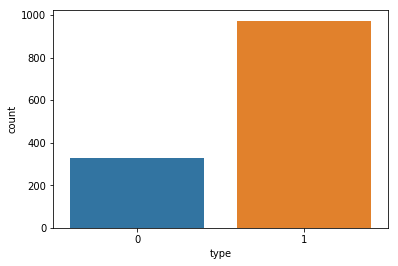

In [25]:
sns.countplot(submission['type'])

In [26]:
submission[submission['type']==0].count()

ID      327
type    327
dtype: int64

In [27]:
submission.to_csv('Submission.csv',index=False)